# Load Package

In [328]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

Data fields

Id : Restaurant id. 

Open Date : opening date for a restaurant

City : City that the restaurant is in. Note that there are unicode in the names. 

City Group: Type of the city. Big cities, or Other. 

Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile

P1, P2 - P37: There are three categories of these obfuscated data.

Demographic data are gathered from third party providers with GIS systems. m
These include population in any given area, age and gender distribution, development scales.

Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. 

Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.

Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

P1-P37: There 3types of categories : Demographic data,Real estate data and commercial data

# Load Package

In [2]:
train = pd.read_csv("train.csv",index_col="Id",parse_dates=["Open Date"])
test = pd.read_csv("test.csv",index_col="Id",parse_dates=["Open Date"])

In [4]:
print(train.shape)
print(test.shape)

(137, 42)
(100000, 41)


In [5]:
train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [7]:
test.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,
0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [8]:
#sort by date
train.sort_values(by ="Open Date",inplace= True)
test.sort_values(by = "Open Date",inplace= True )

# Explore data

### Unique data

In [9]:
# check unique data in train
for i in train.columns:
    print("{} has {} unique data".format(i, len(train[i].unique())))

Open Date has 134 unique data
City has 34 unique data
City Group has 2 unique data
Type has 3 unique data
P1 has 8 unique data
P2 has 8 unique data
P3 has 8 unique data
P4 has 6 unique data
P5 has 7 unique data
P6 has 8 unique data
P7 has 6 unique data
P8 has 8 unique data
P9 has 4 unique data
P10 has 4 unique data
P11 has 8 unique data
P12 has 7 unique data
P13 has 5 unique data
P14 has 10 unique data
P15 has 8 unique data
P16 has 9 unique data
P17 has 9 unique data
P18 has 7 unique data
P19 has 9 unique data
P20 has 9 unique data
P21 has 8 unique data
P22 has 5 unique data
P23 has 9 unique data
P24 has 9 unique data
P25 has 8 unique data
P26 has 10 unique data
P27 has 9 unique data
P28 has 9 unique data
P29 has 7 unique data
P30 has 9 unique data
P31 has 10 unique data
P32 has 10 unique data
P33 has 6 unique data
P34 has 8 unique data
P35 has 8 unique data
P36 has 8 unique data
P37 has 8 unique data
revenue has 137 unique data


In [10]:
# check unique data in test
for i in test.columns:
    print("{} has {} unique data".format(i, len(test[i].unique())))

Open Date has 310 unique data
City has 57 unique data
City Group has 2 unique data
Type has 4 unique data
P1 has 9 unique data
P2 has 9 unique data
P3 has 7 unique data
P4 has 7 unique data
P5 has 6 unique data
P6 has 8 unique data
P7 has 7 unique data
P8 has 8 unique data
P9 has 5 unique data
P10 has 4 unique data
P11 has 8 unique data
P12 has 7 unique data
P13 has 5 unique data
P14 has 10 unique data
P15 has 9 unique data
P16 has 9 unique data
P17 has 10 unique data
P18 has 9 unique data
P19 has 9 unique data
P20 has 9 unique data
P21 has 9 unique data
P22 has 5 unique data
P23 has 9 unique data
P24 has 9 unique data
P25 has 9 unique data
P26 has 10 unique data
P27 has 10 unique data
P28 has 9 unique data
P29 has 8 unique data
P30 has 10 unique data
P31 has 10 unique data
P32 has 10 unique data
P33 has 7 unique data
P34 has 11 unique data
P35 has 7 unique data
P36 has 10 unique data
P37 has 8 unique data


### Missing data

In [12]:
#check missing data in train
for i in train.columns:
    print("{0} has {1:.2f}% missing data".format(i, (len(train[train[i].isnull()]) / train.shape[0]) *100))

Open Date has 0.00% missing data
City has 0.00% missing data
City Group has 0.00% missing data
Type has 0.00% missing data
P1 has 0.00% missing data
P2 has 0.00% missing data
P3 has 0.00% missing data
P4 has 0.00% missing data
P5 has 0.00% missing data
P6 has 0.00% missing data
P7 has 0.00% missing data
P8 has 0.00% missing data
P9 has 0.00% missing data
P10 has 0.00% missing data
P11 has 0.00% missing data
P12 has 0.00% missing data
P13 has 0.00% missing data
P14 has 0.00% missing data
P15 has 0.00% missing data
P16 has 0.00% missing data
P17 has 0.00% missing data
P18 has 0.00% missing data
P19 has 0.00% missing data
P20 has 0.00% missing data
P21 has 0.00% missing data
P22 has 0.00% missing data
P23 has 0.00% missing data
P24 has 0.00% missing data
P25 has 0.00% missing data
P26 has 0.00% missing data
P27 has 0.00% missing data
P28 has 0.00% missing data
P29 has 0.00% missing data
P30 has 0.00% missing data
P31 has 0.00% missing data
P32 has 0.00% missing data
P33 has 0.00% missing 

In [13]:
#check missing data in train
for i in test.columns:
    print("{0} has {1:.2f}% missing data".format(i, (len(test[test[i].isnull()]) / test.shape[0]) *100)) 

Open Date has 0.00% missing data
City has 0.00% missing data
City Group has 0.00% missing data
Type has 0.00% missing data
P1 has 0.00% missing data
P2 has 0.00% missing data
P3 has 0.00% missing data
P4 has 0.00% missing data
P5 has 0.00% missing data
P6 has 0.00% missing data
P7 has 0.00% missing data
P8 has 0.00% missing data
P9 has 0.00% missing data
P10 has 0.00% missing data
P11 has 0.00% missing data
P12 has 0.00% missing data
P13 has 0.00% missing data
P14 has 0.00% missing data
P15 has 0.00% missing data
P16 has 0.00% missing data
P17 has 0.00% missing data
P18 has 0.00% missing data
P19 has 0.00% missing data
P20 has 0.00% missing data
P21 has 0.00% missing data
P22 has 0.00% missing data
P23 has 0.00% missing data
P24 has 0.00% missing data
P25 has 0.00% missing data
P26 has 0.00% missing data
P27 has 0.00% missing data
P28 has 0.00% missing data
P29 has 0.00% missing data
P30 has 0.00% missing data
P31 has 0.00% missing data
P32 has 0.00% missing data
P33 has 0.00% missing 

There are no missing data

### add date columns

In [14]:
#add date columns
train["open_year"] = train["Open Date"].dt.year
train["open_month"] = train["Open Date"].dt.month
train["open_day"] = train["Open Date"].dt.day
train["open_dayofweek"] = train["Open Date"].dt.dayofweek

In [15]:
#add date columns
test["open_year"] = test["Open Date"].dt.year
test["open_month"] = test["Open Date"].dt.month
test["open_day"] = test["Open Date"].dt.day
test["open_dayofweek"] = test["Open Date"].dt.dayofweek

### City

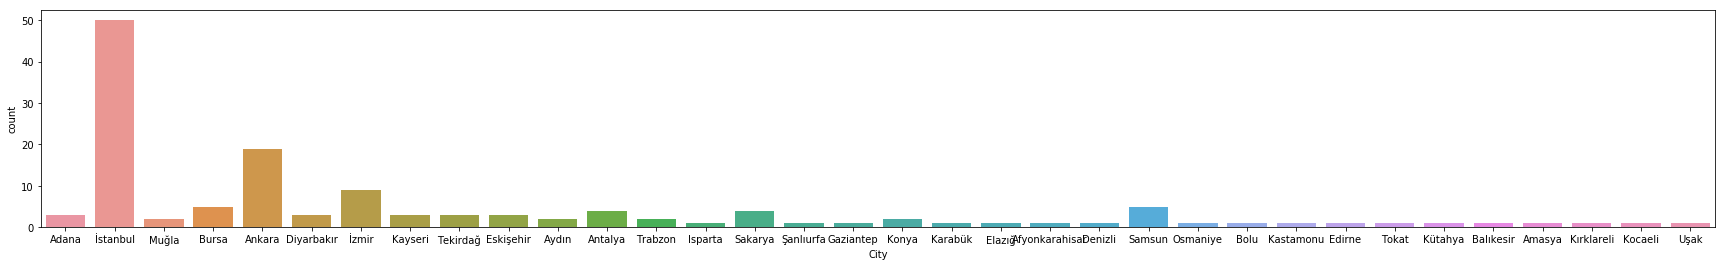

In [16]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(30,4)
sns.countplot(train["City"])

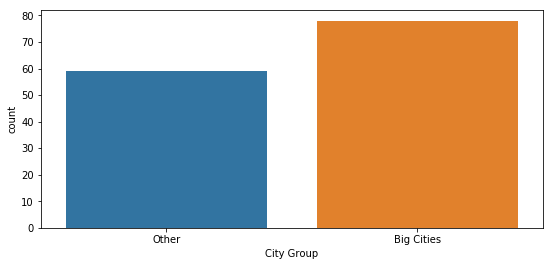

In [17]:
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(9,4)
sns.countplot(train["City Group"])

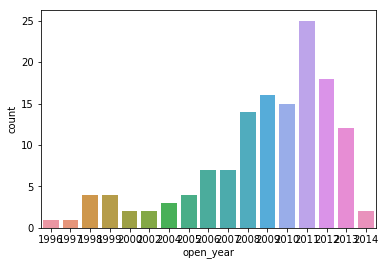

In [18]:
sns.countplot(train["open_year"])

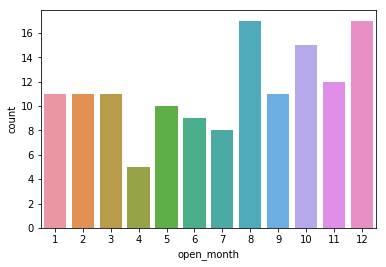

In [19]:
sns.countplot(train["open_month"])

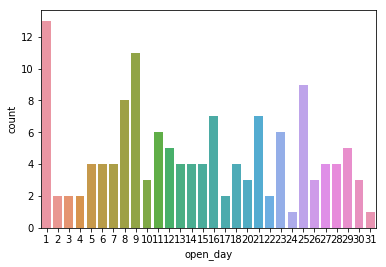

In [20]:
sns.countplot(train["open_day"])

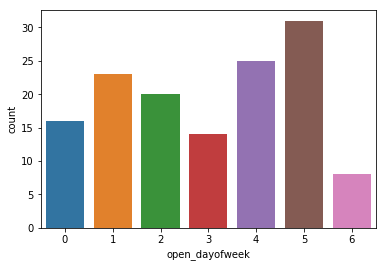

In [21]:
sns.countplot(train["open_dayofweek"])

### P1-P37

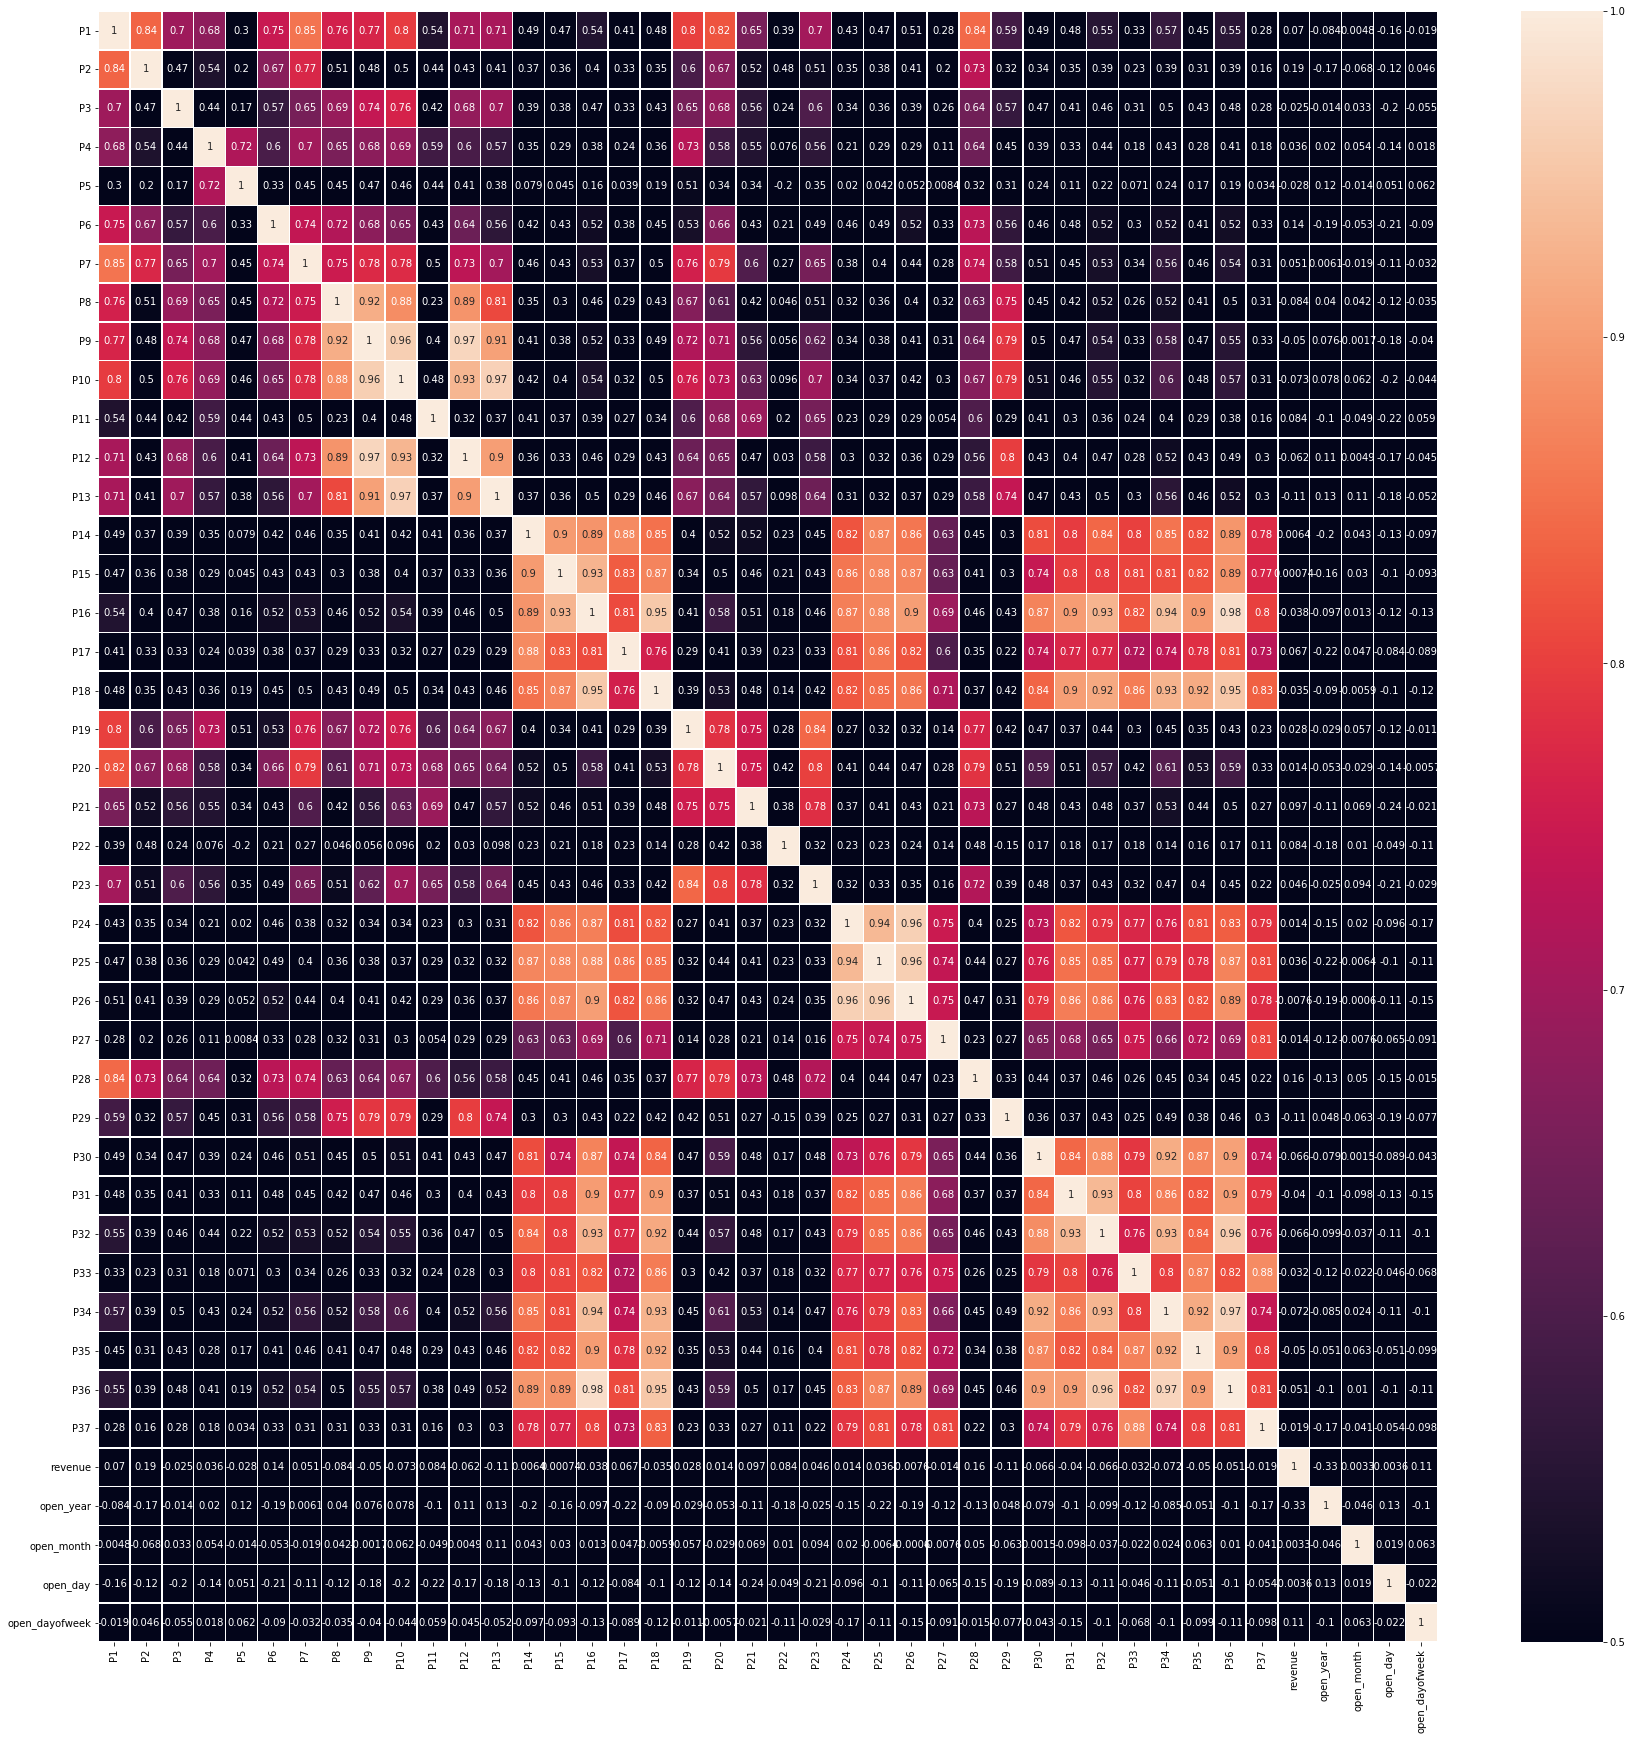

In [22]:
figure.ax = plt.subplots(figsize=(30,30))
sns.heatmap(train.corr(),annot=True,linewidths=.5,vmin=0.5,vmax=1)

I can find some relationship between columns: hint for finding three columns

### Revenue

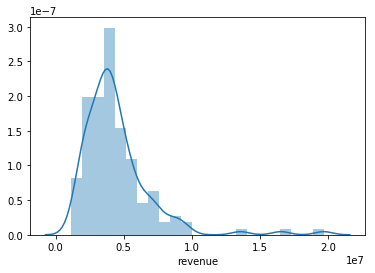

In [23]:
sns.distplot(train["revenue"])

I will apply log for normalization 

### Correlation between revenue and other columns

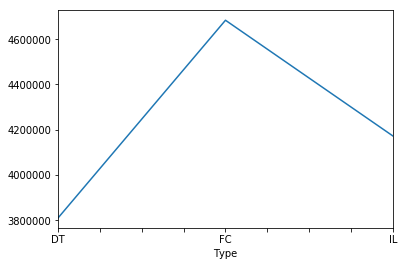

In [24]:
train.groupby("Type")["revenue"].mean().plot()

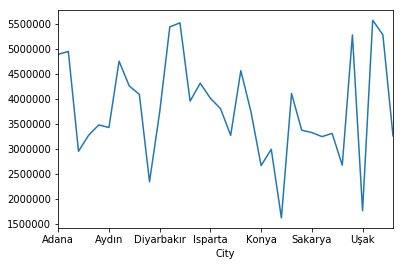

In [25]:
train.groupby("City")["revenue"].mean().plot()

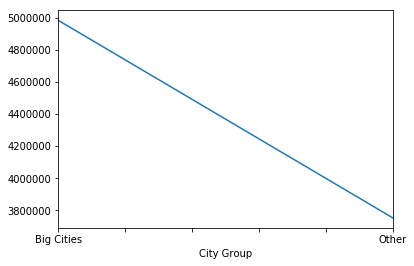

In [26]:
train.groupby("City Group")["revenue"].mean().plot()

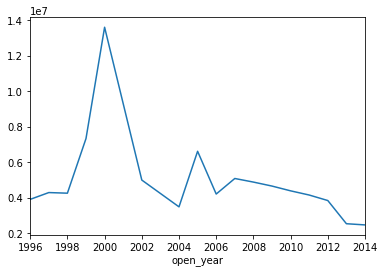

In [27]:
train.groupby("open_year")["revenue"].mean().plot()

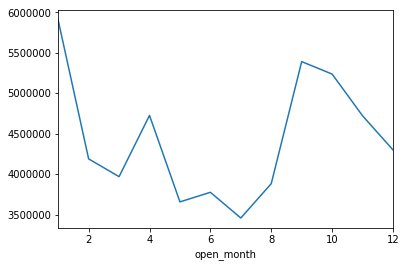

In [28]:
train.groupby("open_month")["revenue"].mean().plot()

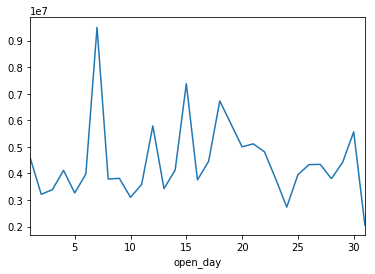

In [29]:
train.groupby("open_day")["revenue"].mean().plot()

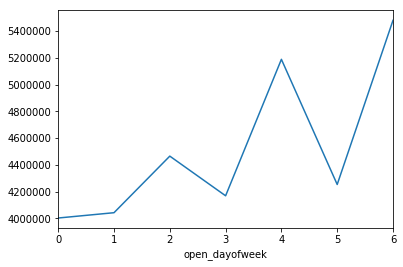

In [30]:
train.groupby("open_dayofweek")["revenue"].mean().plot()

# Preprocessing

Allocate numbers to city according to size of population

In [31]:
train_city = list(train["City"].unique())
test_city = list(test["City"].unique())

In [33]:
all_city = set(train_city + test_city)
all_city = list(all_city)

In [34]:
order={}
order["İstanbul"] = 63
order["Ankara"] = 62
order["İzmir"] = 61
order["Bursa"] = 60
order["Adana"] = 59
order["Gaziantep"] = 58
order["Konya"] = 57
order["Antalya"] = 56
order["Diyarbakır"] = 55
order["Mersin"] = 54
order["Kayseri"] = 53
order["Eskişehir"] = 52
order["Şanlıurfa"] = 51
order["Malatya"] = 50
order["Samsun"] = 49
order["Erzurum"] = 48
order["Kahramanmaraş"] = 47
order["Sakarya"] = 46
order["Denizli"] = 45
order["Elazığ"] = 44
order["Sivas"] = 43
order["Batman"] = 42
order["Balıkesir"] = 41
order["Trabzon"] = 40
order["Manisa"] = 39
order["Kırıkkale"] = 38
order["Kocaeli"] = 37
order["Osmaniye"] = 36
order["Kütahya"] = 35
order["Çorum"] = 34
order["Isparta"] = 33
order["Hatay"] = 32
order["Aydın"] = 31
order["Uşak"] = 30

order["Aksaray"] = 29
order["Afyonkarahisar"] = 28
order["Edirne"] = 27
order["Tokat"] = 26
order["Ordu"] = 25
order["Tekirdağ"] = 24
order["Erzincan"] = 23
order["Zonguldak"] = 22
order["Karabük"] = 21
order["Siirt"] = 20
order["Kırşehir"] = 19
order["Bolu"] = 18
order["Giresun"] = 17
order["Kars"] = 16
order["Rize"] = 15
order["Niğde"] = 14
order["Çanakkale"] = 13
order["Amasya"] = 12
order["Yalova"] = 11
order["Nevşehir"] = 10
order["Mardin"] = 9
order["Kastamonu"] = 8
order["Çankırı"] = 7
order["Düzce"] = 6
order["Kırklareli"] = 5
order["Muğla"] = 4
order["Bilecik"] = 3
order["Artvin"] = 2
order["Tanımsız"] = 1

In [35]:
order = pd.DataFrame.from_dict(order,orient="index")
order.columns =["City"]
order =order.reset_index()
order.columns =["City","number"]

In [36]:
#train
train_merge = pd.merge(train,order, on ="City")
train_merge.drop("City",axis=1,inplace=True)

#test
test_merge = pd.merge(test,order, on ="City")
test_merge.drop("City",axis =1, inplace =True)

In [41]:
#concat for preprocessing
all_merge = pd.concat([train_merge,test_merge],axis=0)

In [46]:
#change string to int(City group)
all_merge.loc[all_merge["City Group"]=="Other","City Group"] = 0
all_merge.loc[all_merge["City Group"]=="Big Cities","City Group"] = 1

In [52]:
#Type
le =LabelEncoder()
Type = le.fit_transform(all_merge["Type"])

In [55]:
all_merge["Type"] = Type

In [64]:
all_merge.columns = ['City Group', 'Open Date', 'P1', 'P10', 'P11', 'P12', 'P13', 'P14',
       'P15', 'P16', 'P17', 'P18', 'P19', 'P2', 'P20', 'P21', 'P22', 'P23',
       'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P3', 'P30', 'P31', 'P32',
       'P33', 'P34', 'P35', 'P36', 'P37', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'Type', 'city_number', 'open_day', 'open_dayofweek', 'open_month',
       'open_year', 'revenue']

### Deal with numberical and categorical

In [77]:
#numberical
num_list = []
for i in all_merge.columns:
    if all_merge[i].dtype == "float64":
        num_list.append(i)
num_list
num_list.remove("revenue")

In [81]:
#categorical
cat_list = []
for i in all_merge.columns:
    if all_merge[i].dtype == "int64":
        cat_list.append(i)

In [87]:
cat_list=np.array(cat_list)

In [88]:
cat_list

array(['P1', 'P10', 'P11', 'P12', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P30', 'P31', 'P32',
       'P33', 'P34', 'P35', 'P36', 'P37', 'P5', 'P6', 'P7', 'P8', 'P9',
       'Type', 'city_number', 'open_day', 'open_dayofweek', 'open_month',
       'open_year'], 
      dtype='<U14')

In [124]:
one_hot_cat= ['P10', 'P11', 'P12', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P30', 'P31', 'P32',
       'P33', 'P34', 'P35', 'P36', 'P37', 'P5', 'P6', 'P7', 'P8', 'P9',
       'Type']

In [127]:
mer = pd.get_dummies(all_merge["P1"],prefix="P1")
for i in one_hot_cat:
    i = pd.get_dummies(all_merge[i],prefix= i)
    mer = pd.concat([mer,i],axis=1)

In [138]:
one_hot_cat= ["P1",'P10', 'P11', 'P12', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P30', 'P31', 'P32',
       'P33', 'P34', 'P35', 'P36', 'P37', 'P5', 'P6', 'P7', 'P8', 'P9',
       'Type']

In [139]:
mer.shape

(100137, 248)

In [141]:
all_merge = all_merge.drop(one_hot_cat,axis=1)

In [142]:
all_merge = pd.concat([all_merge,mer],axis=1)

In [144]:
all_merge.shape

(100137, 264)

## Split train and test

In [145]:
train_pre = all_merge[0:137]
test_pre = all_merge[137:100137]

In [147]:
train_pre.shape

(137, 264)

In [150]:
test_pre.drop("revenue",inplace=True,axis=1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [154]:
train_mer = mer[0:137]
test_mer = mer[137:100137]

In [160]:
x_train_col = train_pre.columns

In [ ]:
['Open Date','open_day', 'open_dayofweek','open_month','open_year''revenue'],

In [164]:
x_train_col = list(x_train_col.drop(['Open Date','open_day', 'open_dayofweek','open_month','open_year','revenue']))

In [184]:
train_pre["City Group"] = train_pre["City Group"].astype("int")
test_pre["City Group"] = test_pre["City Group"].astype("int")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [222]:
all_merge.shape

(100137, 264)

In [220]:
city = pd.get_dummies(all_merge["city_number"],prefix="city")

In [223]:
train_city = city[0:137]
test_city = city[137:100137]

In [257]:
del x_train["city_number"]

In [226]:
del x_test["city_number"]

In [258]:
x_train = pd.concat([x_train,train_city],axis=1)
# x_test = pd.concat([x_test, test_city], axis=1)

In [259]:
x_train.shape

(137, 320)

In [260]:
x_test.shape

(100000, 320)

In [312]:
num_list

['P13', 'P2', 'P26', 'P27', 'P28', 'P29', 'P3', 'P4']

In [313]:
plus_corr = ["P2,P4,P28"]

## Apply polynomial

In [319]:
x_train["P2_2"] = x_train["P2"] **2
x_train["P2_3"] = x_train["P2"]**3
x_train["P4_2"] = x_train["P4"] **2
x_train["P4_3"] = x_train["P4"] **3
x_train["P28_2"] = x_train["P28"] **2
x_train["P28_3"] = x_train["P28"] **3

In [325]:
x_test["P2_2"] = x_test["P2"] **2
x_test["P2_3"] = x_test["P2"]**3
x_test["P4_2"] = x_test["P4"] **2
x_test["P4_3"] = x_test["P4"] **3
x_test["P28_2"] = x_test["P28"] **2
x_test["P28_3"] = x_test["P28"] **3

In [330]:
polo = ["P2","P2_2","P2_3","P4","P4_2","P4_3","P28","P28_2","P28_3"]

In [329]:
scaler = MinMaxScaler()

In [331]:
polo_train = scaler.fit_transform(x_train[polo])

In [332]:
polo_test = scaler.fit_transform(x_test[polo])

In [337]:
x_train[polo] = polo_train

In [339]:
x_test[polo] = polo_test

In [459]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Train

In [165]:
import xgboost as xgb

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [458]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [478]:
model = RandomForestRegressor(n_estimators=99, max_depth=3,max_features=0.129011)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=0.129011, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=99, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [255]:
x_train = train_pre[x_train_col]

In [186]:
y_train = train["revenue"]

In [187]:
#log 
y_train = np.log(y_train)

In [188]:
y_train.shape

(137,)

In [193]:
x_test = test_pre[x_train_col]

In [453]:
x_train["open_month"] = train_pre["open_month"]
x_test["open_month"] =  test_pre["open_month"]

In [463]:
month_train = pd.get_dummies(train_pre["open_month"],prefix="month")
month_test = pd.get_dummies(test_pre["open_month"],prefix="month")

In [464]:
del x_train["open_month"]
del x_test["open_month"]

In [465]:
x_train = pd.concat([x_train,month_train],axis=1)
x_test =pd.concat([x_test, month_test],axis=1)

# Score

In [180]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [295]:
score = cross_val_score(model, x_train, y_train,scoring=rmsle_scorer).mean()
score

0.029907673876351699

# hyper parameter

In [476]:
hyperparameters_list = []

num_epoch = 100

for epoch in range(num_epoch):
    n_estimators = np.random.randint(low=10,high=300)
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)
    min_impurity_decrease = np.random.uniform(low=0.0,high =1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1,
            
                                 )

    score = cross_val_score(model, x_train, y_train,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 0.03142
Score = 0.03101
Score = 0.03121
Score = 0.03121
Score = 0.03231
Score = 0.03142
Score = 0.03131
Score = 0.03121
Score = 0.03136
Score = 0.03169
Score = 0.03122
Score = 0.03115
Score = 0.03132
Score = 0.03119
Score = 0.03156
Score = 0.03139
Score = 0.03144
Score = 0.03141
Score = 0.03140
Score = 0.03166
Score = 0.03143
Score = 0.03135
Score = 0.03143
Score = 0.03143
Score = 0.03140
Score = 0.03181
Score = 0.03124
Score = 0.03179
Score = 0.03147
Score = 0.03152
Score = 0.03123
Score = 0.03222
Score = 0.03163
Score = 0.03135
Score = 0.03169
Score = 0.03149
Score = 0.03189
Score = 0.03123
Score = 0.03154
Score = 0.03142
Score = 0.03111
Score = 0.03117
Score = 0.03044
Score = 0.03141
Score = 0.03152
Score = 0.03148
Score = 0.03167
Score = 0.03088
Score = 0.03062
Score = 0.03137
Score = 0.03113
Score = 0.03138
Score = 0.03183
Score = 0.03139
Score = 0.03149
Score = 0.03156
Score = 0.03114
Score = 0.03166
Score = 0.03161
Score = 0.03136
Score = 0.03150
Score = 0.03140
Score = 

,max_depth,max_features,n_estimators,score
93,3,0.129011,99,0.030295
42,3,0.552763,127,0.030441
48,3,0.850673,214,0.030621
86,57,0.775900,49,0.030755
65,81,0.453995,77,0.030854


In [477]:
hyperparameters_list = []

num_epoch = 100

for epoch in range(num_epoch):
    n_estimators = np.random.randint(low=90,high=250)
    max_depth = np.random.randint(low=1,high=10)
    max_features = np.random.uniform(low=0.1, high=0.7)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, x_train, y_train, \
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 0.03128
Score = 0.03074
Score = 0.03121
Score = 0.03060
Score = 0.03044
Score = 0.03138
Score = 0.03134
Score = 0.03060
Score = 0.03094
Score = 0.03066
Score = 0.03059
Score = 0.03078
Score = 0.03104
Score = 0.03126
Score = 0.03136
Score = 0.03117
Score = 0.03065
Score = 0.03105
Score = 0.03058
Score = 0.03110
Score = 0.03131
Score = 0.03144
Score = 0.03066
Score = 0.03077
Score = 0.03107
Score = 0.03093
Score = 0.03114
Score = 0.03078
Score = 0.03050
Score = 0.03061
Score = 0.03110
Score = 0.03072
Score = 0.03074
Score = 0.03061
Score = 0.03121
Score = 0.03113
Score = 0.03071
Score = 0.03127
Score = 0.03052
Score = 0.03064
Score = 0.03093
Score = 0.03102
Score = 0.03084
Score = 0.03126
Score = 0.03120
Score = 0.03060
Score = 0.03125
Score = 0.03047
Score = 0.03060
Score = 0.03104
Score = 0.03078
Score = 0.03110
Score = 0.03120
Score = 0.03082
Score = 0.03068
Score = 0.03092
Score = 0.03080
Score = 0.03101
Score = 0.03069
Score = 0.03102
Score = 0.03048
Score = 0.03106
Score = 

,max_depth,max_features,n_estimators,score
85,3,0.451632,238,0.030442
4,3,0.518471,156,0.030445
47,2,0.452054,195,0.030467
60,2,0.130799,212,0.030483
28,2,0.666328,212,0.030502


In [479]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=0.129011, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=99, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [468]:
importance = model.feature_importances_

In [469]:
importance.shape

(61,)

In [470]:
index = list(x_train.columns)

In [471]:
important = pd.DataFrame(importance,index=index)

In [472]:
important = important.sort_values(by=0,ascending=False)

In [399]:
good_fea= list(important[important[0] >0.01].index)

In [401]:
x_train = x_train[good_fea]

In [402]:
x_test = x_test[good_fea]

In [426]:
year = pd.get_dummies(all_merge["open_year"])

In [428]:
year_train = year[0:137]
year_test = year[137:100137]

In [429]:
x_train = pd.concat([x_train,year_train], axis=1)
x_test = pd.concat([x_test,year_test], axis = 1)

In [430]:
del x_train["open_year"]
del x_test["open_year"]

In [433]:
model = RandomForestRegressor(n_estimators=156, max_depth=2,max_features=0.261526)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=0.261526, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [442]:
num_list

['P13', 'P2', 'P26', 'P27', 'P28', 'P29', 'P3', 'P4']

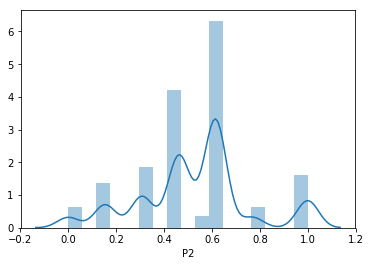

In [450]:
sns.distplot(x_train["P2"])

# Predict

In [480]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=0.129011, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=99, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [481]:
predictions = model.predict(x_test)

In [482]:
predictions = np.exp(predictions) 

In [483]:
predictions

array([ 4331841.00942279,  4283847.09896028,  5444461.08299323, ...,
        3400054.08037768,  3336653.46015848,  4116171.32584585])

## Submit

In [484]:
sub = pd.read_csv("sampleSubmission.csv",index_col="Id")

In [485]:
sub["Prediction"] = predictions

In [486]:
sub.to_csv("submit9.csv")